In [10]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter


In [19]:
plt.style.use('default')
plt.rc('font', size=18)
plt.rc('axes', titlesize=24)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.rc('legend', fontsize=18)

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [20]:
dataToPlot = ['applicationTime', 'databaseTime', 'numberOfSellOffers', 'numberOfBuyOffers']
folders = ['10800s']

In [21]:
hardware = '8CPU_20RAM'

In [4]:
#hardware = '12CPU_30RAM'

In [22]:
tests = ['2repl', '4repl', '5repl', '6repl']

In [17]:
#tests = ['trans_60s', 'trans_120s', 'trans_180s', 'trans_240s', 'trans_300s']

In [143]:
#tests = ['req_250ms', 'req_500ms', 'req_1000ms', 'req_2000ms']

In [152]:
#tests = ['A1_100-A2_100-A3_100', 'A1_200-A3_100', 'A2_200', 'A2_200-A3_100', 'A3_200']

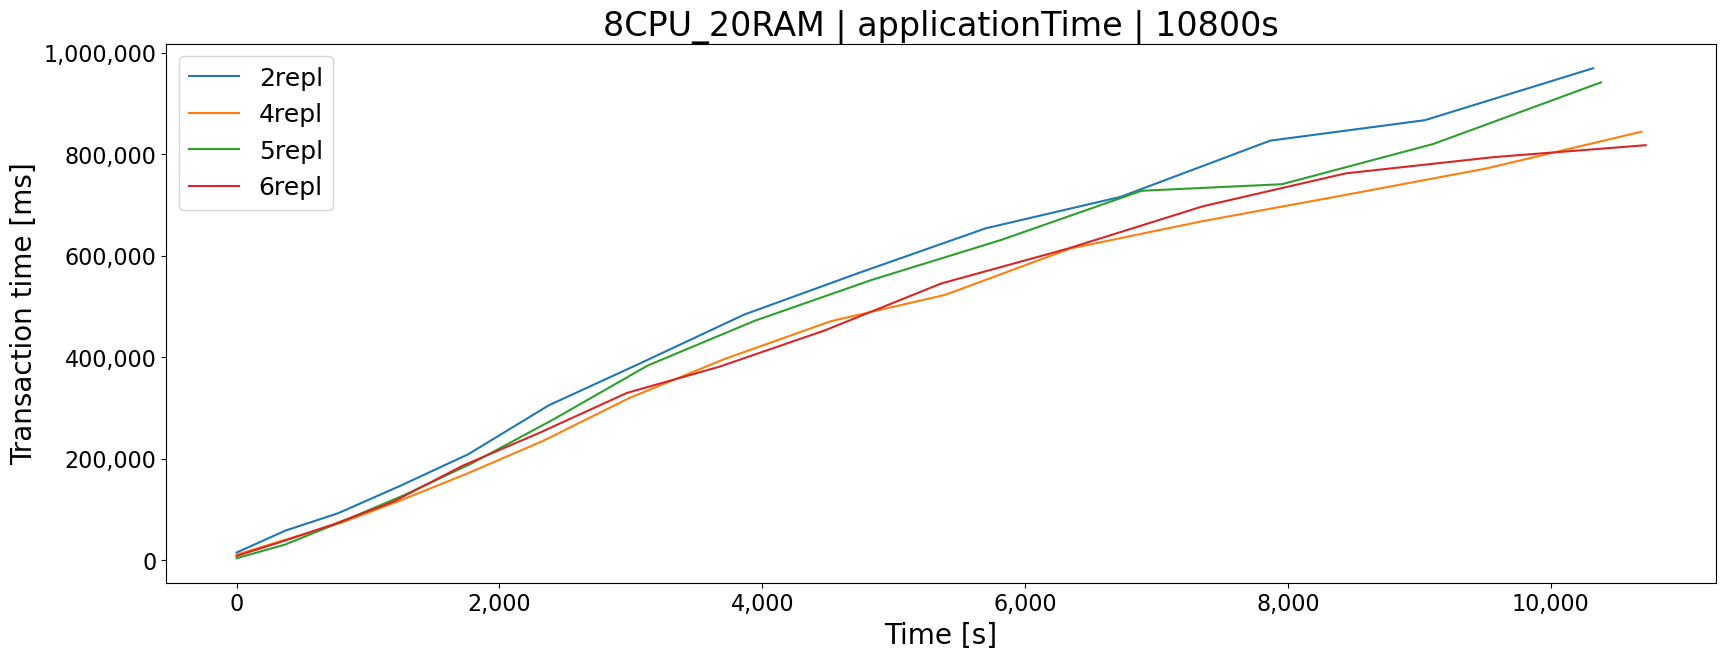

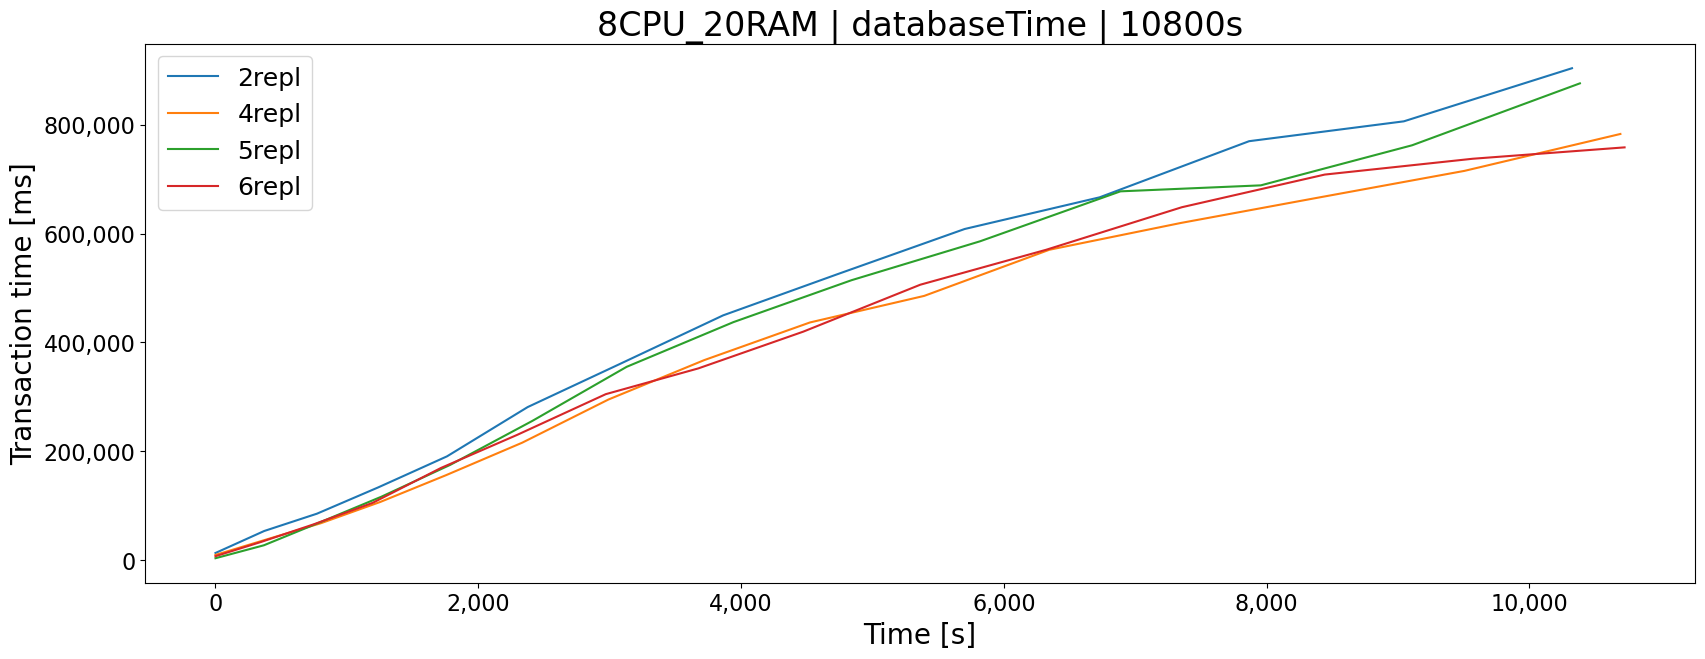

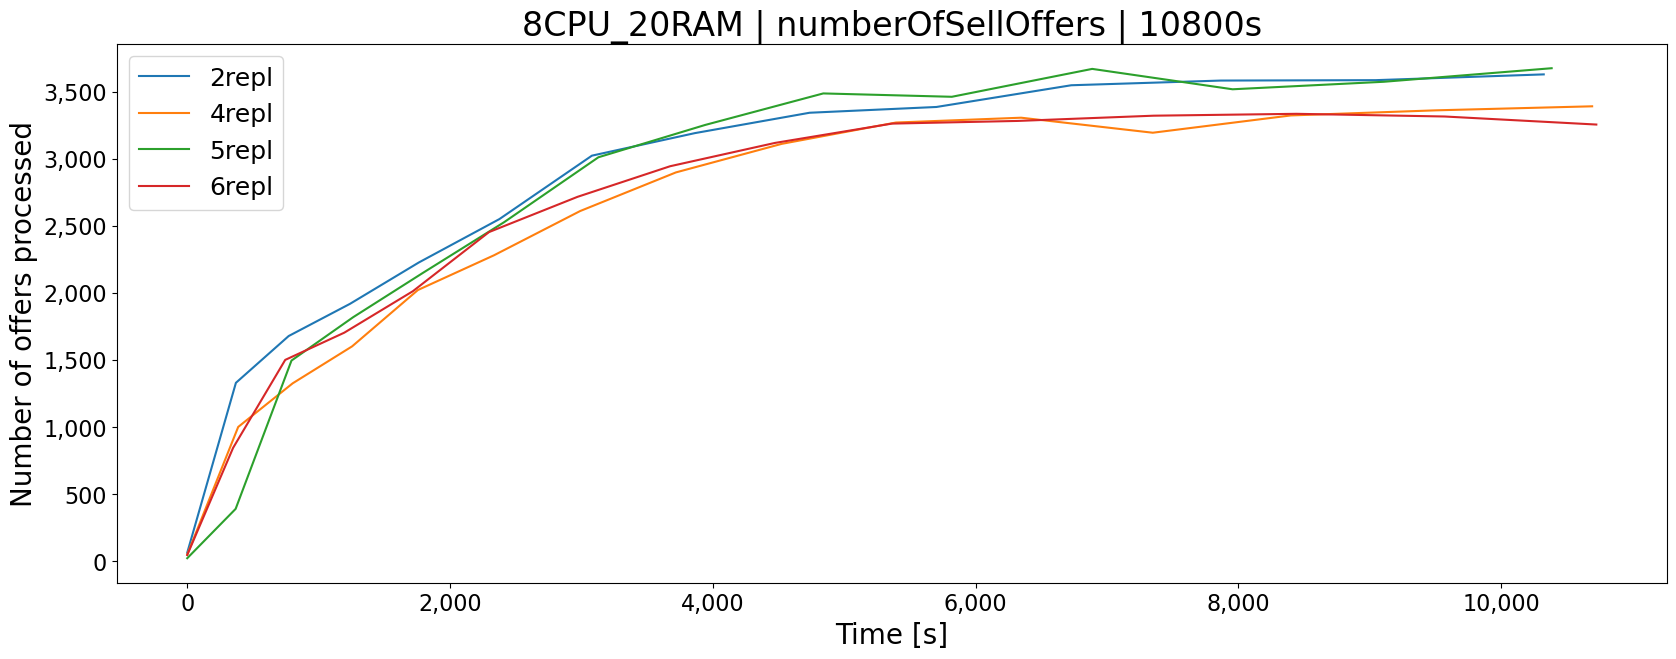

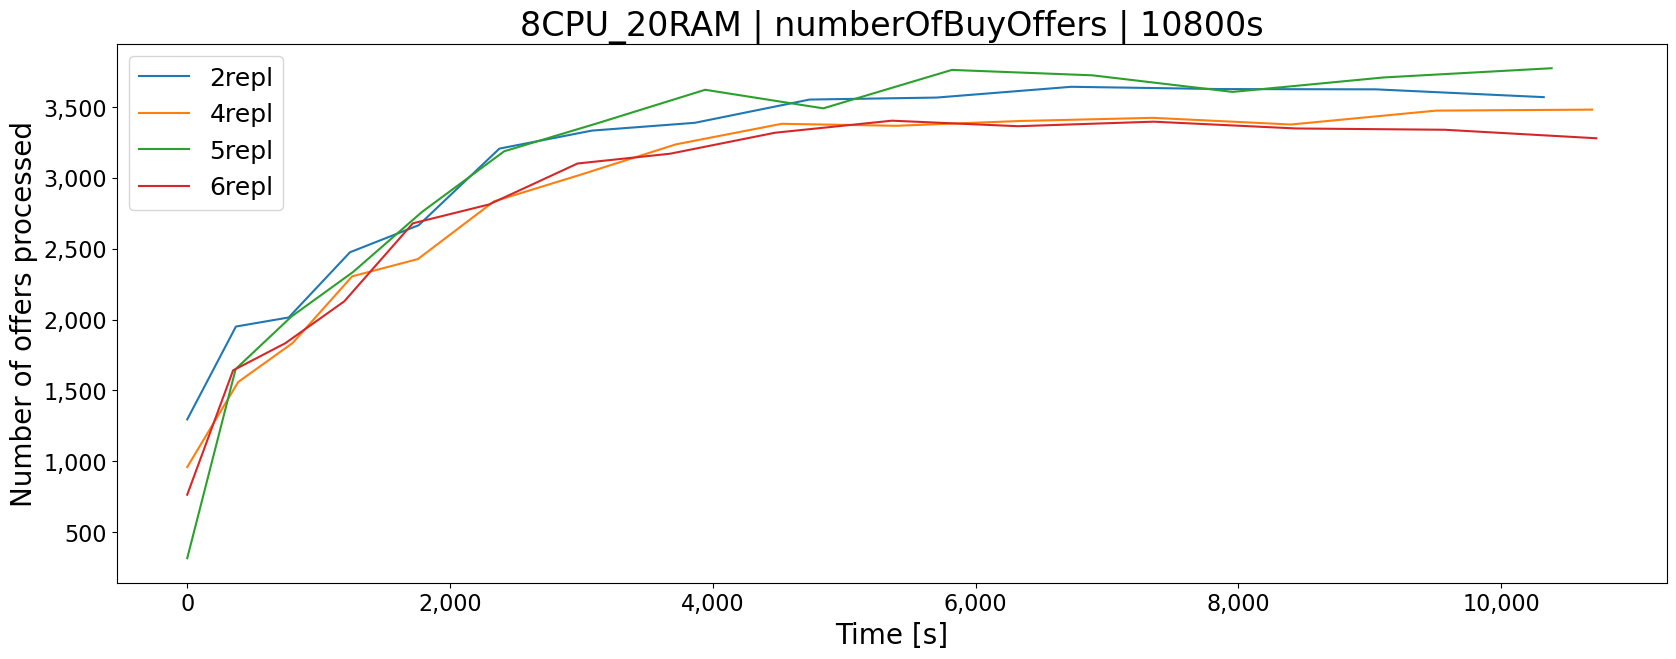

In [23]:
for f in folders:
    for j in dataToPlot:
        data = pd.DataFrame()
        for i in tests:
            try:
                d = pd.read_csv(hardware + '/' + f + '/' + i + '/trading.csv', usecols=['timestamp', j])
            except:
                continue
            d = d.sort_values(by=['timestamp'])
            t = d['timestamp'][0]
            d['Time [s]'] = d['timestamp'].apply(lambda x: (x - t)/1000)

            customDataFrame = pd.DataFrame({'Time [s]': d['Time [s]'], i: d[j]})
            customDataFrame = customDataFrame.loc[customDataFrame['Time [s]'] < int(f[:-1])]
            
            data = pd.concat([data, customDataFrame])
        ax = data.set_index('Time [s]').plot(figsize=(20, 7), title = hardware + ' | ' +  j + ' | ' + f)
        ax.set_xlabel("Time [s]")
        if re.search("^.*Time$", j):
            ax.set_ylabel("Transaction time [ms]")
        else:
            ax.set_ylabel("Number of offers processed")

        plt.legend(loc='best')
        ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
        ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))